<a href="https://colab.research.google.com/github/belyakov23/intro-ml-projects-/blob/main/messy_housing_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Model comparison

I trained both a simple Linear Regression model and a RandomForestRegressor on the cleaned housing dataset to see how a linear baseline compares to a more flexible tree‑based model.

| Model                 | MAE   | RMSE  | R²    |
|-----------------------|-------|-------|-------|
| Linear Regression     | ≈0.96 | ≈1.31 | ≈0.97 |
| RandomForestRegressor | ≈0.88 | ≈1.22 | ≈0.97 |


In [15]:
!pip install -q kagglehub

import kagglehub
import os
import pandas as pd

# Download latest version of the dataset
path = kagglehub.dataset_download(
    "siddant007/multiplelinearregression-outliers-missing-values"
)

print("Path to dataset files:", path)
print(os.listdir(path))

csv_path = os.path.join(
    path, "MLR with Outliers and Missing Values By Siddant007.csv"
)
df = pd.read_csv(csv_path)

df.head()


Using Colab cache for faster access to the 'multiplelinearregression-outliers-missing-values' dataset.
Path to dataset files: /kaggle/input/multiplelinearregression-outliers-missing-values
['.nfs00000000767b4b3f000000da', 'MLR with Outliers and Missing Values By Siddant007.csv']


,HouseSize,DistanceToCity,Location,Price
0,NaN,22.92,B,20.74
1,48.6,27.90,B,19.35
2,NaN,28.29,A,23.30
3,65.2,25.99,A,25.37
4,47.7,29.19,A,19.66


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HouseSize       95 non-null     float64
 1   DistanceToCity  95 non-null     float64
 2   Location        100 non-null    object 
 3   Price           100 non-null    float64
dtypes: float64(3), object(1)
memory usage: 3.3+ KB


In [17]:
df.describe(include="all")


,HouseSize,DistanceToCity,Location,Price
count,95.000000,95.000000,100,100.000000
unique,NaN,NaN,3,NaN
top,NaN,NaN,B,NaN
freq,NaN,NaN,37,NaN
mean,53.026316,32.570421,NaN,22.250000
std,19.867916,11.910253,NaN,6.993549
min,23.800000,20.410000,NaN,13.510000
25%,44.200000,26.035000,NaN,19.167500
50%,49.300000,30.870000,NaN,20.450000
75%,56.750000,33.425000,NaN,23.320000


In [18]:
print("Columns:", df.columns.tolist())
df.isna().sum()


Columns: ['HouseSize', 'DistanceToCity', 'Location', 'Price']


,0
HouseSize,5
DistanceToCity,5
Location,0
Price,0


In [19]:
df_clean = df.dropna(subset=["HouseSize", "DistanceToCity"]).copy()

df_encoded = pd.get_dummies(df_clean, columns=["Location"], drop_first=True)

df_clean.shape, df_encoded.shape, df_clean.isna().sum()


((90, 4),
 (90, 5),
 HouseSize         0
 DistanceToCity    0
 Location          0
 Price             0
 dtype: int64)

In [20]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("Price", axis=1)
y = df_encoded["Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((72, 4), (18, 4))

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(0.957749202756927, np.float64(1.3099934903125068), 0.9700148640277144)

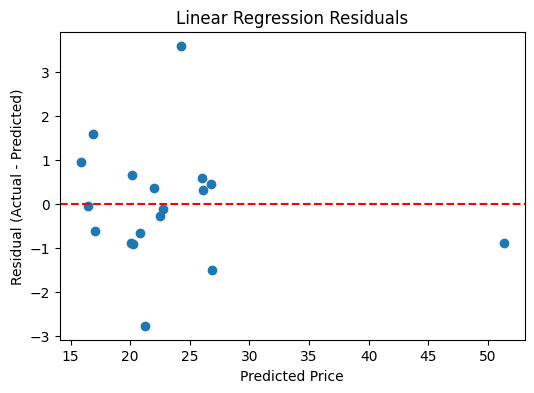

In [22]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Price")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Linear Regression Residuals")
plt.show()


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, rmse_rf, r2_rf


(0.8811111111111022, np.float64(1.2201722742665768), 0.9739858253132936)

In [24]:
from sklearn.impute import SimpleImputer

X_full = df.drop("Price", axis=1)
y_full = df["Price"]

X_full_encoded = pd.get_dummies(X_full, columns=["Location"], drop_first=True)

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X_full_encoded)

X_imputed = pd.DataFrame(X_imputed, columns=X_full_encoded.columns)

X_imputed.isna().sum()


,0
HouseSize,0
DistanceToCity,0
Location_B,0
Location_C,0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_imputed, y_full, test_size=0.2, random_state=42
)

lin_imp = LinearRegression()
lin_imp.fit(X_train_imp, y_train_imp)
y_pred_lin_imp = lin_imp.predict(X_test_imp)

mae_lin_imp = mean_absolute_error(y_test_imp, y_pred_lin_imp)
rmse_lin_imp = np.sqrt(mean_squared_error(y_test_imp, y_pred_lin_imp))
r2_lin_imp = r2_score(y_test_imp, y_pred_lin_imp)

rf_imp = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf_imp.fit(X_train_imp, y_train_imp)
y_pred_rf_imp = rf_imp.predict(X_test_imp)

mae_rf_imp = mean_absolute_error(y_test_imp, y_pred_rf_imp)
rmse_rf_imp = np.sqrt(mean_squared_error(y_test_imp, y_pred_rf_imp))
r2_rf_imp = r2_score(y_test_imp, y_pred_rf_imp)

(mae_lin_imp, rmse_lin_imp, r2_lin_imp), (mae_rf_imp, rmse_rf_imp, r2_rf_imp)


((1.0012978888164308, np.float64(1.1802818425318118), 0.7561985791557465),
 (1.0200699999999956, np.float64(1.3779912553242113), 0.6676790631900901))

### Effect of imputing missing values

I also tried a version of the pipeline where I kept all 100 rows and used mean imputation for the numeric features before training the models. On this small dataset, imputing missing values actually degraded performance compared to dropping the incomplete rows.

| Model                     | Handling missing values | MAE   | RMSE  | R²    |
|---------------------------|-------------------------|-------|-------|-------|
| Linear Regression         | Drop missing rows       | ≈0.96 | ≈1.31 | ≈0.97 |
| RandomForestRegressor     | Drop missing rows       | ≈0.88 | ≈1.22 | ≈0.97 |
| Linear Regression (imputed) | Mean imputation       | ≈1.00 | ≈1.18 | ≈0.76 |
| RandomForest (imputed)    | Mean imputation         | ≈1.02 | ≈1.38 | ≈0.67 |


### Conclusion

This project shows how to handle a small but messy regression dataset by cleaning missing values, encoding a categorical feature, and comparing linear and tree-based models. Dropping rows with missing numeric values and one-hot encoding the location feature produced strong performance for both Linear Regression and RandomForestRegressor, with the random forest giving slightly lower errors on the test set. A follow-up experiment with mean imputation kept all rows but led to worse test metrics, highlighting that simple imputation is not always better than discarding a few incomplete observations in small datasets.
